In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import xgboost as xgb
path = "C:/Users/Hoël/Documents/vrais documents/AIC/Apprentissage/Projet/data/"

### 1/ Reading the data

In [19]:
train = pd.read_csv(path+"train.csv")
print(train.shape)

#Reformattons la colonne target pour avoir des entiers
train.target = train.target.str.replace('Class_','').astype(int)
train.head()

(61878, 95)


,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [5]:
test = pd.read_csv(path+"test.csv")
print(test.shape)
test.head()

(144368, 94)


,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


In [6]:
submit = pd.read_csv(path+"sampleSubmission.csv")
print(submit.shape)
submit.head()

(144368, 10)


,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,1,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0


### 2/ Data visualization

In [29]:
train.drop(['id','target'],axis = 1).corrwith(train['target']).nlargest(10)

feat_24    0.226936
feat_36    0.226549
feat_20    0.219909
feat_69    0.217790
feat_8     0.209725
feat_75    0.206344
feat_41    0.205505
feat_18    0.200805
feat_22    0.200545
feat_38    0.199895
dtype: float64

In [30]:
train.drop(['id','target'],axis = 1).corrwith(train['target']).nsmallest(10)

feat_14   -0.365092
feat_40   -0.330114
feat_25   -0.294079
feat_15   -0.259047
feat_88   -0.240481
feat_72   -0.208646
feat_33   -0.179347
feat_9    -0.175350
feat_64   -0.139826
feat_43   -0.122226
dtype: float64

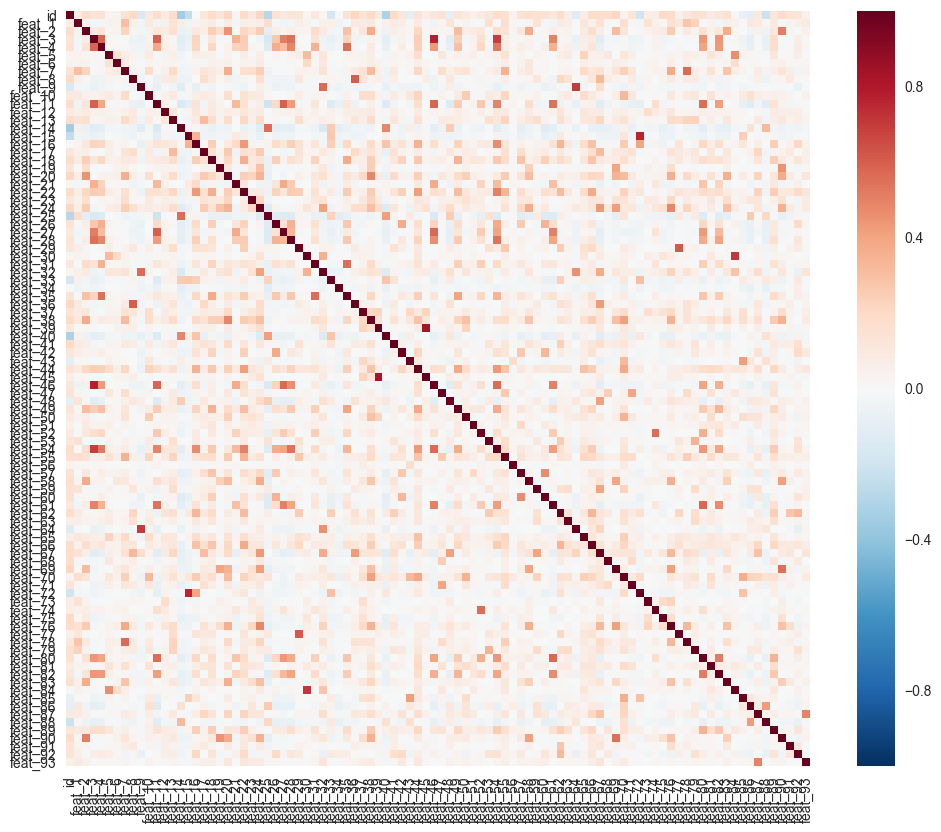

In [26]:
plt.figure(figsize = (12,10))
sns.heatmap(train.drop('target',axis = 1).corr())

In [5]:
train.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [33]:
train.target.value_counts().sort_index()

1     1929
2    16122
3     8004
4     2691
5     2739
6    14135
7     2839
8     8464
9     4955
Name: target, dtype: int64

In [16]:
# Juste pour se rappeler de la fonction get_dummies
targets = pd.get_dummies(train.target)
print(targets.shape)
targets.head()

(61878, 9)


,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


In [21]:
print("Nombre d'éléments par classe:")
targets.sum()

Nombre d'éléments par classe:


Class_1     1929
Class_2    16122
Class_3     8004
Class_4     2691
Class_5     2739
Class_6    14135
Class_7     2839
Class_8     8464
Class_9     4955
dtype: int64

In [19]:
model = xgb.XGBRegressor()
model.fit(train.drop(['id','target'],1),targets.Class_1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [25]:
model.get_score()

AttributeError: 'XGBRegressor' object has no attribute 'get_score'

In [34]:
from time import clock

from sklearn.grid_search import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

from sklearn.lda import LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor
from xgboost import XGBClassifier

C:\Program Files\Python 3.4\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Program Files\Python 3.4\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Program Files\Python 3.4\lib\site-packages\sklearn\lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [119]:
X, y = train.drop(['id','target'],axis = 1), train.target

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
labels = train.target.unique()

In [116]:
model = XGBClassifier()
model.fit(X_train,y_train)

y_probas = model.predict_proba(X_test)

print("Mean log_loss : %.4f" %log_loss(y_test,y_probas))

Mean log_loss : 0.6483


In [108]:
model = RandomForestClassifier(n_estimators=150, criterion ='entropy')
model.fit(X_train,y_train)

y_probas = model.predict_proba(X_test)

print("Mean log_loss : %.4f" %log_loss(y_test,y_probas))

Mean log_loss : 0.5887


In [109]:
model = LDA()
model.fit(X_train,y_train)

y_probas = model.predict_proba(X_test)

print("Mean log_loss : %.4f" %log_loss(y_test,y_probas))

Mean log_loss : 0.9215


In [110]:
model = GaussianNB()
model.fit(X_train,y_train)

y_probas = model.predict_proba(X_test)

print("Mean log_loss : %.4f" %log_loss(y_test,y_probas))

Mean log_loss : 7.2519


In [111]:
model = MLPClassifier()
model.fit(X_train,y_train)

y_probas = model.predict_proba(X_test)

print("Mean log_loss : %.4f" %log_loss(y_test,y_probas))

Mean log_loss : 0.6568


In [114]:
model = SGDClassifier(loss = 'log')
model.fit(X_train,y_train)

y_probas = model.predict_proba(X_test)

print("Mean log_loss : %.4f" %log_loss(y_test,y_probas))

Mean log_loss : 2.0798


C:\Program Files\Python 3.4\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [113]:
model = AdaBoostClassifier()
model.fit(X_train,y_train)

y_probas = model.predict_proba(X_test)

print("Mean log_loss : %.4f" %log_loss(y_test,y_probas))

Mean log_loss : 2.0262


In [132]:
Ytr.value_counts()

6    14135
8     8464
3     8004
2     5675
9     4955
7     2839
5     2739
4     2691
Name: target, dtype: int64

For 1 components
mean log_loss: 16.9423
For 2 components
mean log_loss: 7.8266
For 3 components
mean log_loss: 5.5609
For 4 components
mean log_loss: 4.6084
For 5 components
mean log_loss: 3.6161
For 6 components
mean log_loss: 3.0924
For 7 components
mean log_loss: 2.7842
For 8 components
mean log_loss: 2.5750
For 9 components
mean log_loss: 2.4044
For 10 components
mean log_loss: 2.3347
For 11 components
mean log_loss: 2.2613
For 12 components
mean log_loss: 2.2244
For 13 components
mean log_loss: 2.0192
For 14 components
mean log_loss: 2.0215
For 15 components
mean log_loss: 1.9411
For 16 components
mean log_loss: 1.9620
For 17 components
mean log_loss: 1.9511
For 18 components
mean log_loss: 1.8641
For 19 components
mean log_loss: 1.8714
For 20 components
mean log_loss: 1.8737
For 21 components
mean log_loss: 1.8328
For 22 components
mean log_loss: 1.8404
For 23 components
mean log_loss: 1.8237
For 24 components
mean log_loss: 1.8098
For 25 components
mean log_loss: 1.8074
For 26 c

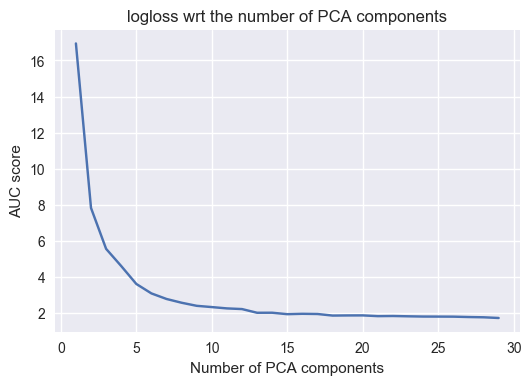

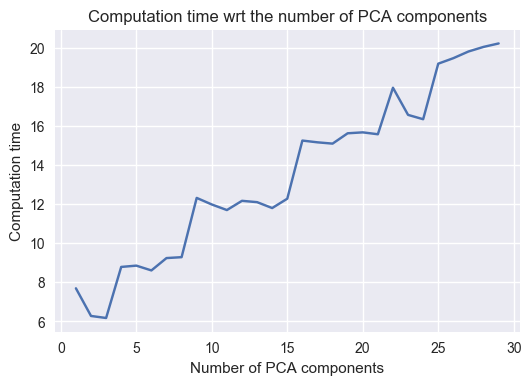

In [136]:
from sklearn.model_selection import StratifiedKFold
nsplits = 5
kfold = StratifiedKFold(n_splits = nsplits, random_state = 42)
# Optimisation du nombre de composantes dans la PCA
tps = clock()
scores = []
times = []
model = RandomForestClassifier()
max_comp = 30
for n_comp in range(1,max_comp):
    tps2 = clock()
    pca = PCA(n_components=n_comp)
    score = 0
    for train_index,test_index in kfold.split(X,y):
        Xtr,Ytr = X.loc[train_index],y.loc[train_index]
        Xte,Yte = X.loc[test_index],y.loc[test_index]
    
        Xtr_new = pca.fit_transform(Xtr,Ytr)
        model.fit(Xtr_new,Ytr)
    
        Xte_new = pca.transform(Xte)
        y_probas = model.predict_proba(Xte_new)
        score += log_loss(Yte,y_probas,labels = [1,2,3,4,5,6,7,8,9])
    
    score /= nsplits
    scores.append(score)
    times.append(clock()-tps2)
    print("For %i components"%n_comp)
    print("mean log_loss: %.4f"%score)

print("Computation time: %.2fs" %(clock()-tps))
plt.plot(np.arange(1,max_comp),scores)
plt.title("logloss wrt the number of PCA components")
plt.xlabel("Number of PCA components")
plt.ylabel("AUC score")
plt.figure()
plt.plot(np.arange(1,max_comp),times)
plt.title("Computation time wrt the number of PCA components")
plt.xlabel("Number of PCA components")
plt.ylabel("Computation time")

In [ ]:
# Non supervisé sur les données de base puis sur des dummified (0 if 0, 1 sinon) avec plusieurs nombres de clusters
# NN avec des neurones OR et AND pour regrouper des données et identifier des interactions (Keras?)
# Faire un stratify pour le train test split (ou le kfold plus tard)